## Question 1: What is Deep Learning? Briefly describe how it evolved and how it differs from traditional machine learning.
Answer:Deep Learning is a subset of Machine Learning that uses artificial neural networks with multiple hidden layers (deep neural networks) to automatically learn patterns from large amounts of data. It is inspired by the structure and functioning of the human brain.
Evolution:
Early ML relied on manual feature engineering and simple models.
Neural networks existed earlier but were limited by low computing power.
Advances in GPUs, big data, and algorithms like backpropagation enabled deep networks.
Deep Learning became dominant after breakthroughs in image recognition (2012) and NLP.
Difference from Traditional Machine Learning:
Traditional ML requires manual feature extraction.
Deep Learning automatically learns features from raw data.
Deep Learning performs better on unstructured data like images, audio, and text.
Deep Learning requires more data and computation.

## Question 2: Explain the basic architecture and functioning of a Perceptron. What are its limitations?
Answer:
A Perceptron is the simplest neural network model used for binary classification.
Architecture:
Input features
Weights
Bias
Activation function (usually step function)
Functioning:
Inputs are multiplied by weights.
A bias is added.
The result is passed through an activation function.
Output is either 0 or 1.
Limitations:
Can only solve linearly separable problems
Cannot solve XOR problem
Uses a simple step function (non-differentiable)
No hidden layers

## Question 3: Describe the purpose of activation function in neural networks. Compare Sigmoid, ReLU, and Tanh functions.
Answer:
Activation functions introduce non-linearity into neural networks, enabling them to learn complex patterns.
Function	Range	Pros	Cons
Sigmoid	(0,1)	Smooth, probabilistic output	Vanishing gradient
Tanh	(-1,1)	Zero-centered	Still vanishing gradient
ReLU	(0, ∞)	Fast, avoids vanishing gradient	Dying ReLU problem
ReLU is preferred in hidden layers, Sigmoid in binary output layers.

## Question 4: What is the difference between Loss function and Cost function in neural networks? Provide examples.
Answer:
Loss Function: Error for a single data point.
Cost Function: Average loss over the entire dataset.
Examples:
Mean Squared Error (MSE)
Binary Cross-Entropy
Categorical Cross-Entropy
Loss is used per sample, cost guides overall optimization.

## Question 5: What is the role of optimizers in neural networks? Compare Gradient Descent, Adam, and RMSprop.
Answer:
Optimizers update model weights to minimize loss.
Optimizer	특징
Gradient Descent	Simple, slow
RMSprop	Adaptive learning rate
Adam	Fast, combines momentum + RMSprop
Adam is widely used due to speed and stability.

In [1]:
#Question 6: Write a Python program to implement a single-layer perceptron from scratch using NumPy to solve the logical AND gate.

import numpy as np

X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,0,0,1])

weights = np.random.rand(2)
bias = 0.0
lr = 0.1

for epoch in range(100):
    for i in range(len(X)):
        z = np.dot(X[i], weights) + bias
        y_pred = 1 if z >= 0 else 0
        error = y[i] - y_pred
        weights += lr * error * X[i]
        bias += lr * error

print("Final Weights:", weights)
print("Bias:", bias)

for x in X:
    z = np.dot(x, weights) + bias
    print(f"{x} -> {1 if z >= 0 else 0}")


Final Weights: [0.24404621 0.40966601]
Bias: -0.6
[0 0] -> 0
[0 1] -> 0
[1 0] -> 0
[1 1] -> 1


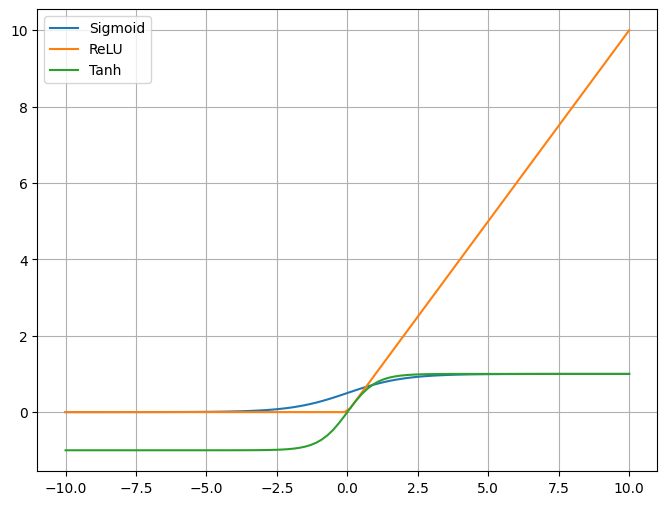

In [2]:
#Question 7: Implement and visualize Sigmoid, ReLU, and Tanh activation functions using Matplotlib.
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)

sigmoid = 1 / (1 + np.exp(-x))
relu = np.maximum(0, x)
tanh = np.tanh(x)

plt.figure(figsize=(8,6))
plt.plot(x, sigmoid, label="Sigmoid")
plt.plot(x, relu, label="ReLU")
plt.plot(x, tanh, label="Tanh")
plt.legend()
plt.grid()
plt.show()


In [3]:
#Question 8: Use Keras to build and train a simple multilayer neural network on the MNIST digits dataset. Print the training accuracy.

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

(X_train, y_train), _ = tf.keras.datasets.mnist.load_data()
X_train = X_train / 255.0

model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, epochs=5, batch_size=32)
print("Training Accuracy:", history.history['accuracy'][-1])


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9261 - loss: 0.2595
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9664 - loss: 0.1142
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9765 - loss: 0.0782
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9826 - loss: 0.0570
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9857 - loss: 0.0462
Training Accuracy: 0.9857333302497864


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8232 - loss: 0.5026
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8633 - loss: 0.3779
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8762 - loss: 0.3403
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8839 - loss: 0.3152
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8906 - loss: 0.2987


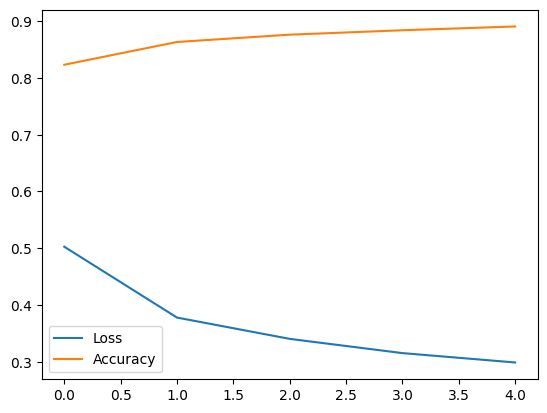

In [4]:
#Question 9: Visualize the loss and accuracy curves for a neural network model trained on the Fashion MNIST dataset. Interpret the training behavior.
import tensorflow as tf
import matplotlib.pyplot as plt

(X_train, y_train), _ = tf.keras.datasets.fashion_mnist.load_data()
X_train = X_train / 255.0

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=5)

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['accuracy'], label='Accuracy')
plt.legend()
plt.show()

#Interpretation:

#Loss decreases steadily → learning is effective

#Accuracy increases → model improves

#No sharp divergence → minimal overfitting

Question 10: Fraud Detection System – Real-Time Data Science Workflow

Answer:

Model Design:

Use a multilayer neural network

Input: transaction amount, merchant ID, location (encoded)

Hidden layers with ReLU

Output layer with Sigmoid

Activation & Loss:

Hidden layers: ReLU

Output: Sigmoid

Loss: Binary Cross-Entropy

Handling Class Imbalance:

Class weighting

Oversampling (SMOTE)

Precision, Recall, F1-score evaluation

Optimizer & Overfitting Prevention:

Optimizer: Adam

Dropout layers

Early stopping

L2 regularization

In [5]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(20,)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("Model ready for training on imbalanced fraud dataset")


Model ready for training on imbalanced fraud dataset


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
